# 1. Importação dos pacotes e dados

In [ ]:
#-- Basics
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#-- Preprocessing
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

#-- Clustering
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans
import warnings

#-- Warnings
warnings.filterwarnings('ignore')

In [ ]:
# Base do Titanic

df = pd.read_csv('/content/train (1).csv')

# 2. Etapa 1 - Estruturação dos dados

## 1. EDA

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
print(f'{(df.isnull().sum())*100 / df.shape[0]}%')

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Embarked     0.224467
dtype: float64%


In [ ]:
for col in df.columns:
  print(col)
  print(df[col].value_counts())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [ ]:
df.drop(columns = ['Cabin', 'PassengerId', 'Ticket', 'Name'], inplace = True)

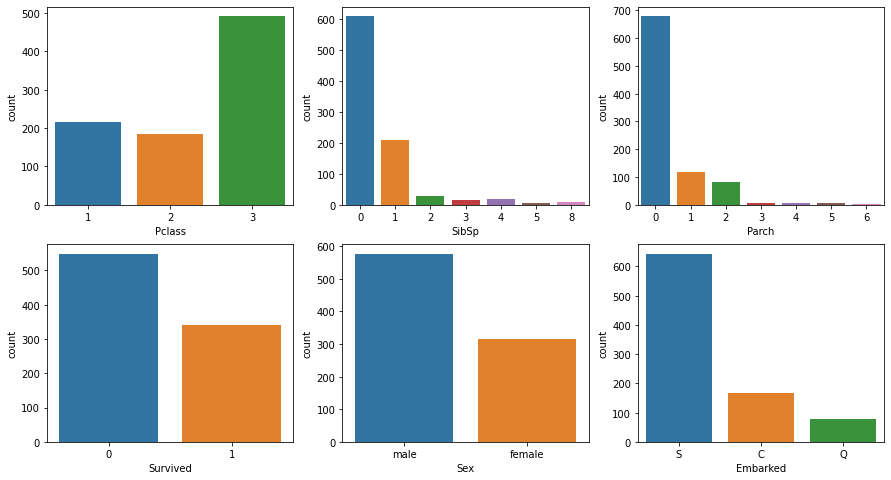

In [ ]:
cols = ['Pclass','SibSp', 'Parch', 'Survived', 'Sex', 'Embarked']

plt.figure(figsize=(15,8))
count = 0

for col in cols:
  count += 1
  plt.subplot(2,3,count)
  sns.countplot(df[col])

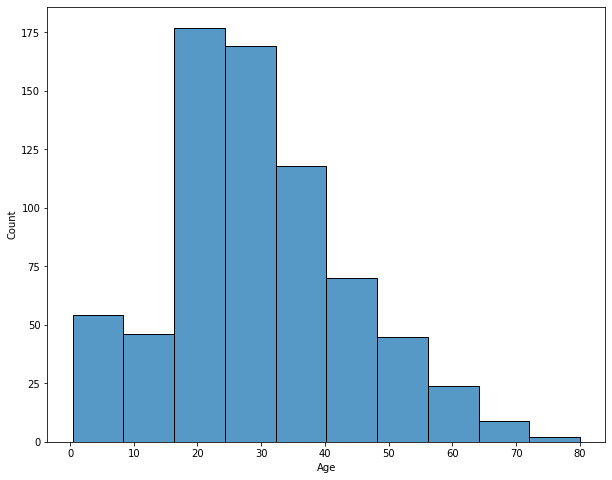

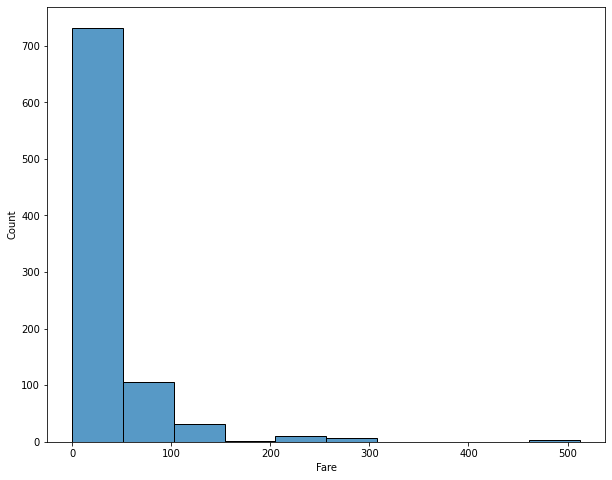

In [ ]:
cols_2 = ['Age', 'Fare']

for col in cols_2:
  
  fig = plt.figure(figsize = (10,8))
  sns.histplot(data = df, x = col, bins = 10)
  plt.show()

## 2. Features engineering

In [ ]:
df['Embarked'].dropna(inplace = True)

In [ ]:
df_1 = df[df['Pclass'] == 1]
df_2 = df[df['Pclass'] == 2]
df_3 = df[df['Pclass'] == 3]

In [ ]:
for dataframe in [df_1, df_2, df_3]:

  dataframe['Age'].fillna(dataframe['Age'].mean(), inplace = True)

In [ ]:
df_x = df_1.append(df_2)
df2 = df_x.append(df_3)

In [ ]:
cols_3 = ['Pclass', 'Sex', 'Embarked', 'Survived']

df3 = pd.get_dummies(data = df2, columns = cols_3, drop_first = True)

In [ ]:
cols_4 = ['Age', 'Parch', 'Fare']

for col in cols_4:
  
  df3 = df3[df3[col] <= df3[col].quantile(.99)]

# 3. Etapa 2 - Análise do dataset

## Questão a)

In [ ]:
df3.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_1
1,38.0,1,0,71.2833,0,0,0,0,0,1
3,35.0,1,0,53.1000,0,0,0,0,1,1
6,54.0,0,0,51.8625,0,0,1,0,1,0
11,58.0,0,0,26.5500,0,0,0,0,1,1
23,28.0,0,0,35.5000,0,0,1,0,1,1


In [ ]:
df3.describe(percentiles = (.9, .99, .995))

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_1
count,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000,868.000000
mean,28.817340,0.514977,0.337558,28.973362,0.209677,0.556452,0.649770,0.086406,0.725806,0.383641
std,12.632151,1.103003,0.687754,36.796743,0.407313,0.497089,0.477317,0.281124,0.446364,0.486552
min,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,14.254150,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
90%,47.000000,1.000000,1.000000,75.562510,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
99%,62.000000,5.000000,2.000000,211.337500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
99.5%,63.000000,8.000000,3.000000,227.525000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,65.000000,8.000000,4.000000,247.520800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Questão b)

In [ ]:
for col in df3.columns:

  print(col)
  print(df3[col].value_counts())

Age
25.140620    136
38.233441     30
24.000000     29
22.000000     27
30.000000     25
            ... 
0.920000       1
12.000000      1
14.500000      1
36.500000      1
34.500000      1
Name: Age, Length: 85, dtype: int64
SibSp
0    596
1    203
2     26
4     18
3     13
8      7
5      5
Name: SibSp, dtype: int64
Parch
0    669
1    116
2     75
3      5
4      3
Name: Parch, dtype: int64
Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     33
26.0000    31
           ..
16.0000     1
5.0000      1
50.4958     1
39.4000     1
10.5167     1
Name: Fare, Length: 244, dtype: int64
Pclass_2
0    686
1    182
Name: Pclass_2, dtype: int64
Pclass_3
1    483
0    385
Name: Pclass_3, dtype: int64
Sex_male
1    564
0    304
Name: Sex_male, dtype: int64
Embarked_Q
0    793
1     75
Name: Embarked_Q, dtype: int64
Embarked_S
1    630
0    238
Name: Embarked_S, dtype: int64
Survived_1
0    535
1    333
Name: Survived_1, dtype: int64


In [ ]:
cols_5 = list(df3.columns)
cols_5.remove('Age')
cols_5.remove('Fare')

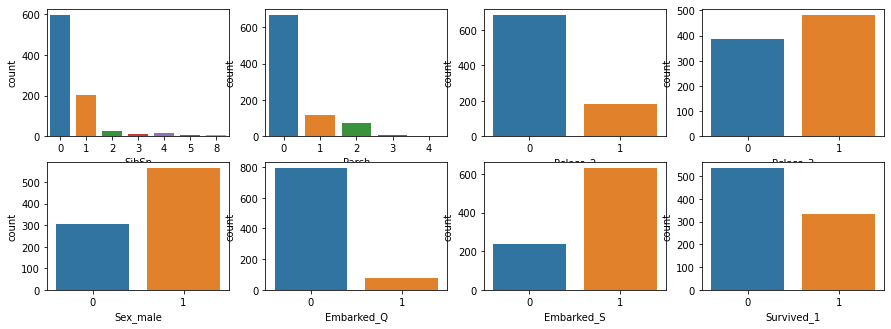

In [ ]:
plt.figure(figsize=(15,8))
count = 0

for col in cols_5:
  count += 1
  plt.subplot(3,4,count)
  sns.countplot(df3[col])

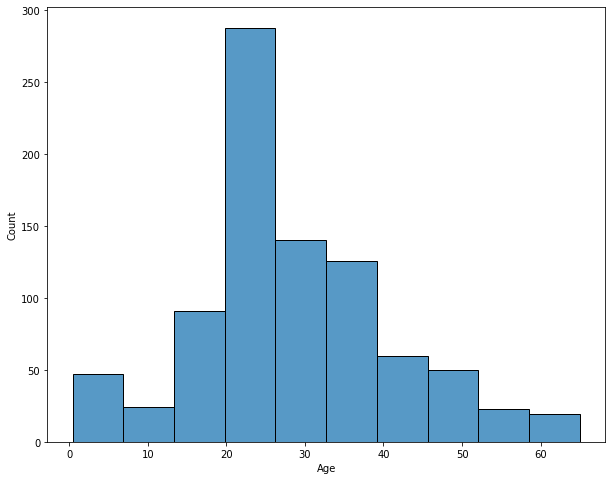

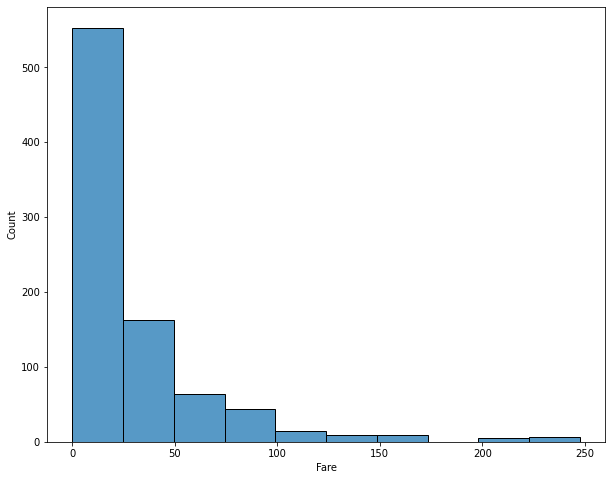

In [ ]:
for col in ['Age', 'Fare']:
  
  fig = plt.figure(figsize = (10,8))
  sns.histplot(data = df3, x = col, bins = 10)
  plt.show()

## Questão c)

In [ ]:
df3.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_2      0
Pclass_3      0
Sex_male      0
Embarked_Q    0
Embarked_S    0
Survived_1    0
dtype: int64

In [ ]:
df4 = df3.copy()

model = PCA(n_components = 3)
X = model.fit_transform(df4)
X_df = pd.DataFrame(X)
X_df.columns = ['X', 'Y', 'Z']

fig = px.scatter_3d(X_df, x='X', y='Y', z='Z')
fig.show()

# 4. Etapa 3 - Clusterização

## Questão a)

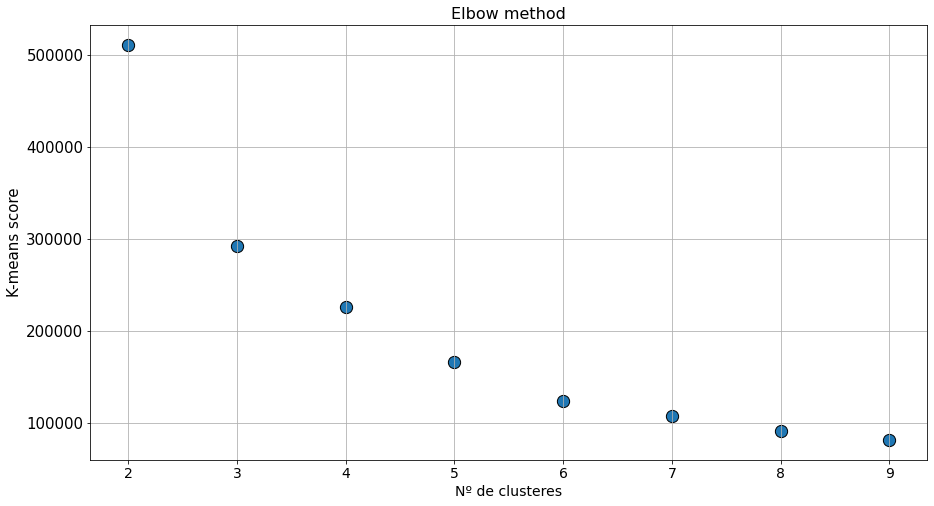

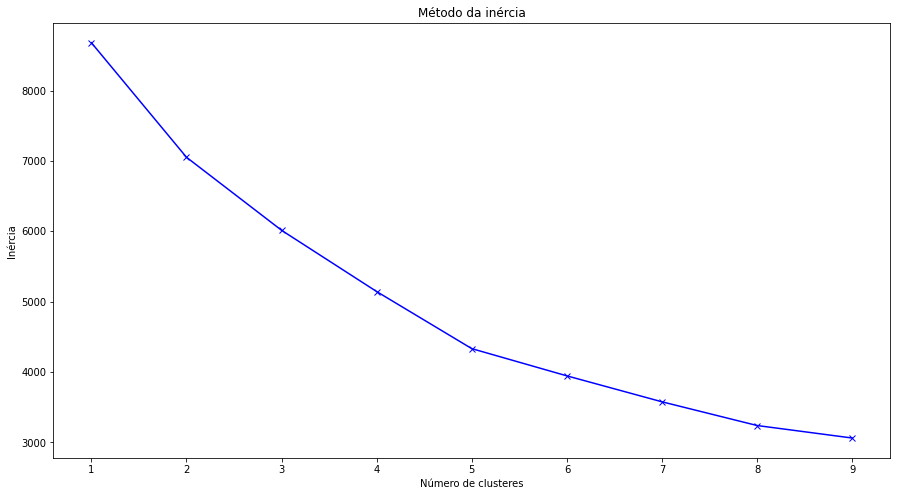

In [ ]:
# Standardize data

scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df4)

alvo = df4

max = 10
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
gm_bic= []
gm_score=[]

for i in range(2,max):

    km = KMeans(n_clusters=i, random_state=0).fit(alvo)
    preds = km.predict(alvo)
    
    km_scores.append(-km.score(alvo))
    
# Primeira análise: Elbow Method

# Plotagens do método Elbow

plt.figure(figsize=(15,8))
plt.title("Elbow method", fontsize=16)
plt.scatter(x=[i for i in range(2,max)],y=km_scores,s=150,edgecolor='k')
plt.grid(True) 
plt.xlabel("Nº de clusteres",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,max)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


inertias = []
K = range(1, 10)

from scipy.spatial.distance import cdist

for k in K:
    
    kmeanModel = KMeans(n_clusters=k).fit(scaled_df)
    inertias.append(kmeanModel.inertia_)

fig = plt.figure(figsize = (15,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('Número de clusteres')
plt.ylabel('Inércia')
plt.title('Método da inércia')
plt.show()

## Questão b)

In [ ]:
plt.figure(figsize=(15,15))

# Aplicar o kmeans

for i in [4, 5, 6, 7]:

  kmean = KMeans(n_clusters=i)
  kmean_list = kmean.fit_predict(df4)

  X_df['KMean_'+ str(i)] = kmean_list

  fig = px.scatter_3d(X_df, x='X', y='Y', z='Z', color='KMean_'+ str(i))
  fig.show()

<Figure size 1080x1080 with 0 Axes>

## Questão c)

In [ ]:
# Aplicar o meanshift

analyzer = MeanShift(n_jobs=-1)
analyzer.fit(df4)

labels = analyzer.labels_
print(np.unique(labels))

X_df['MShift'] = labels

fig = px.scatter_3d(X_df, x='X', y='Y', z='Z', color='MShift')
fig.show()

[0 1 2 3 4]


## Questão d)

In [ ]:
fig = px.scatter_3d(X_df, x='X', y='Y', z='Z', color='KMean_5')
fig.show()

fig = px.scatter_3d(X_df, x='X', y='Y', z='Z', color='MShift')
fig.show()

## Questão e)

In [ ]:
df['KMean_5'] = X_df['KMean_5']
df['MeanShift'] = X_df['MShift']

### K-means

In [ ]:
# Separando os clusteres

df_k_0 = df[df['KMean_5'] == 0]
df_k_1 = df[df['KMean_5'] == 1]
df_k_2 = df[df['KMean_5'] == 2]
df_k_3 = df[df['KMean_5'] == 3]
df_k_4 = df[df['KMean_5'] == 4]

#Questões: 

print('Tamanho de cada cluster: ')
print(df['KMean_5'].value_counts())

cont = 0

for data in [df_k_0, df_k_1, df_k_2, df_k_3, df_k_4]:
  
  print(f'Cluster\n {cont}')
  print('\nIdade:')
  print(f"Média: {data['Age'].mean():.2f} / Max: {data['Age'].max()} / Min: {data['Age'].min()}")
  print('\nTamanho familiar: ')
  print(f"Média: {data['Parch'].mean() + data['SibSp'].mean()} / Max: {data['Parch'].max()+ data['SibSp'].max()} / Min: {data['Parch'].min() + data['SibSp'].min()} / Moda: {data['Parch'].mode() + data['SibSp'].mode()}")
  print('\nGênero: ')
  print(f"Valores únicos: {data['Sex'].value_counts()} / Moda: {data['Sex'].mode()}")
  print('\nTaxa de passagem: ')
  print(f"Média: {data['Fare'].mean():.2f} / Max: {data['Fare'].max()} / Min: {data['Fare'].min()} ")
  print('\nClasses: ')
  print(f"Valores únicos: {data['Pclass'].value_counts()} / Moda: {data['Pclass'].mode()}")
  print('\nIrmãos e cônjuges: ')
  print(f"Valores únicos: {data['SibSp'].value_counts()} / Moda: {data['SibSp'].mode()}")
  print('\nPais e filhos: ')
  print(f"Valores únicos: {data['Parch'].value_counts()} / Moda: {data['Parch'].mode()}")
  cont += 1





Tamanho de cada cluster: 
2.0    529
0.0    178
3.0    117
1.0     33
4.0     11
Name: KMean_5, dtype: int64
Cluster
 0

Idade:
Média: 30.20 / Max: 71.0 / Min: 0.75

Tamanho familiar: 
Média: 0.9101123595505618 / Max: 12 / Min: 0 / Moda: 0    0
dtype: int64

Gênero: 
Valores únicos: male      114
female     64
Name: Sex, dtype: int64 / Moda: 0    male
dtype: object

Taxa de passagem: 
Média: 33.42 / Max: 512.3292 / Min: 0.0 

Classes: 
Valores únicos: 3    94
1    42
2    42
Name: Pclass, dtype: int64 / Moda: 0    3
dtype: int64

Irmãos e cônjuges: 
Valores únicos: 0    115
1     51
4      4
2      4
8      3
3      1
Name: SibSp, dtype: int64 / Moda: 0    0
dtype: int64

Pais e filhos: 
Valores únicos: 0    136
1     27
2     13
4      1
3      1
Name: Parch, dtype: int64 / Moda: 0    0
dtype: int64
Cluster
 1

Idade:
Média: 29.23 / Max: 54.0 / Min: 9.0

Tamanho familiar: 
Média: 0.9696969696969697 / Max: 8 / Min: 0 / Moda: 0    0
dtype: int64

Gênero: 
Valores únicos: male      24
fe

### MeanShift

In [ ]:
# Separando os clusteres

df_k_0 = df[df['MeanShift'] == 0]
df_k_1 = df[df['MeanShift'] == 1]
df_k_2 = df[df['MeanShift'] == 2]
df_k_3 = df[df['MeanShift'] == 3]
df_k_4 = df[df['MeanShift'] == 4]

#Questões: 

print('Tamanho de cada cluster: ')
print(df['MeanShift'].value_counts())

cont = 0

for data in [df_k_0, df_k_1, df_k_2, df_k_3, df_k_4]:
  
  print(f'Cluster \n{cont}')

  print('Idade:')
  print(f"Média: {data['Age'].mean():.2f} / Max: {data['Age'].max()} / Min: {data['Age'].min()}")
  print('\nTamanho familiar: ')
  print(f"Média: {data['Parch'].mean() + data['SibSp'].mean()} / Max: {data['Parch'].max()+ data['SibSp'].max()} / Min: {data['Parch'].min() + data['SibSp'].min()} / Moda: {data['Parch'].mode() + data['SibSp'].mode()}")
  print('\nGênero: ')
  print(f"Valores únicos: {data['Sex'].value_counts()} / Moda: {data['Sex'].mode()}")
  print('\nTaxa de passagem: ')
  print(f"Média: {data['Fare'].mean():.2f} / Max: {data['Fare'].max()} / Min: {data['Fare'].min()} ")
  print('\nClasses: ')
  print(f"Valores únicos: {data['Pclass'].value_counts()} / Moda: {data['Pclass'].mode()}")
  print('\nIrmãos e cônjuges: ')
  print(f"Valores únicos: {data['SibSp'].value_counts()} / Moda: {data['SibSp'].mode()}")
  print('\nPais e filhos: ')
  print(f"Valores únicos: {data['Parch'].value_counts()} / Moda: {data['Parch'].mode()}")
  cont += 1

Tamanho de cada cluster: 
0.0    700
1.0    122
2.0     18
3.0     17
4.0     11
Name: MeanShift, dtype: int64
Cluster 
0
Idade:
Média: 30.36 / Max: 80.0 / Min: 0.42

Tamanho familiar: 
Média: 0.8471428571428572 / Max: 14 / Min: 0 / Moda: 0    0
dtype: int64

Gênero: 
Valores únicos: male      452
female    248
Name: Sex, dtype: int64 / Moda: 0    male
dtype: object

Taxa de passagem: 
Média: 34.43 / Max: 512.3292 / Min: 0.0 

Classes: 
Valores únicos: 3    369
1    183
2    148
Name: Pclass, dtype: int64 / Moda: 0    3
dtype: int64

Irmãos e cônjuges: 
Valores únicos: 0    481
1    165
2     24
4     12
3     10
8      5
5      3
Name: SibSp, dtype: int64 / Moda: 0    0
dtype: int64

Pais e filhos: 
Valores únicos: 0    540
1     91
2     60
3      4
4      2
5      2
6      1
Name: Parch, dtype: int64 / Moda: 0    0
dtype: int64
Cluster 
1
Idade:
Média: 26.00 / Max: 65.0 / Min: 0.67

Tamanho familiar: 
Média: 1.1639344262295084 / Max: 13 / Min: 0 / Moda: 0    0
dtype: int64

Gênero: 